## The single flavor approximation

After manipulating the Boltzamann equations, we can consider the single flavor approxiamtion for the type-II leptogenesis scenario where the heavy scalar triplet decays into a lepton pair. For such an approach, we have $Y_{\Sigma \Delta} = Y_\Delta + Y_{\Delta^{*}}$ and $Y_{\Delta(B-L)}$, which are related by 
$$ sHz\frac{dY_{\Sigma \Delta}}{dz} =\gamma_D \left(\frac{Y_{\Sigma \Delta}}{Y_{\Sigma \Delta}^{eq}}-1\right)-2\gamma_A \left(\left (\frac{Y_{\Sigma \Delta}}{Y_{\Sigma \Delta}^{eq}}\right)^2-1\right) $$

$$sHz\frac{dY_{\Delta(B-L)}}{dz} = -\gamma_D \epsilon_\Delta \left(\frac{Y_{\Sigma \Delta}}{Y_{\Sigma \Delta}^{eq}}-1\right),$$

where, according to the paper [Flavor always matters in scalar triplet leptogenesis](https://arxiv.org/pdf/1503.00629), 

$$ Y_{\Sigma \Delta}^{eq} = \frac{135}{2\pi^4 g_{*}}z^2 \mathcal{K}_2(z),$$ 
$$ \frac{\gamma_D}{sHz} = s Y_{\Sigma \Delta}^{eq} \Gamma_\Delta \frac{\mathcal{K}_1(z)}{\mathcal{K}_2(z)} \frac{1}{sHz}=\frac{135z^3 \mathcal{K}_1(z)}{2\pi^5 g_{*}^{3/2}}\frac{3\sqrt{10}M_{Pl}\Gamma_\Delta}{M_\Delta^2}$$
$$ -\frac{2 \gamma_A}{sHz} = -\frac{1.1007\times 10^{16}\text{GeV}}{g_{*}^{3/2}M_\Delta} e^{-1.49z^{1.0735}}.$$

$\mathcal{K}_1$ and $\mathcal{K}_2$ are the modified Bessel functions of the second kind for, respectively, $n=1$ and $n=2$.


We add d.o.fs for the heavy right-handed neutrino and the scalar triplet to the SM $g_{*}$, resulting into 
$$ g_{*} = g_{*}^{SM}+ g_\Delta + \frac{7}{8}g_N = 111.5$$
Besides, we use $M_\Delta = 10^{12}$ GeV and $M_{Pl} = 2.44 \times 10^{18}$ GeV. In the one flavor approximation, we can take $|\mu|=0.1 M_\Delta$ and 
$$ \lambda_\ell^2 = \frac{\text{Tr}(ff^\dagger)}{\text{Tr}(ff^\dagger)+|\mu|^2/M_\Delta^2}\;\;\text{and}\;\; \lambda_H = \frac{|\mu|^2/M_\Delta^2}{\text{Tr}(ff^\dagger)+|\mu|^2/M_\Delta^2}$$
to obey $\lambda_H \gg \lambda_\ell$, which takes the total decay rate 
$$ \Gamma_\Delta = \frac{M_\Delta}{32\pi}\left(\text{Tr}(ff^\dagger)+\frac{|\mu|^2}{M_\Delta^2}\right) \approx \frac{10^{10}}{32\pi}\text{GeV}$$

In [1]:
from timeit import default_timer as timer
import numpy as np
import math as mh
import scipy.integrate as sci
from scipy.integrate import solve_ivp, odeint, quad
from scipy.optimize import root
import matplotlib.pyplot as plt
from scipy.special import kv, zeta #modified Bessel function
import latex 
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer modern"
})
from numpy import pi, exp, log, sqrt, inf

In [4]:
g_star = 111.5
M_Delta = 10e12 #GeV
M_Pl = 2.44*10e18 #Reduced Planck mass in GeV
Gamma_Delta = (10e10)/(32*pi) #GeV

#equilibrium Y_{\Sigma \Delta}
def Sigma_Delta_eq(z):
    return (135/(g_star*2*pi**4))*(z**2)*kv(2,z)

Sigma_Delta_0 = Sigma_Delta_eq(10e-4)

Let us use 
$$ \epsilon_\Delta \sim 10^{-7}.$$

Consider the coupling constants of the EW theory to be given by the following relations 
$$ e = g_2 \sin \theta_W $$
$$ e = g_Y \cos \theta_W. $$
If $\alpha = 1/137.036 $, $e = \sqrt{4\pi \alpha}$ and $\sin^2 \theta_W = 0.23129$, then 
$$g_2 = 0.629664$$
$$g_Y = 0.420313$$

In [83]:
#definition of the decay intensity D = \gamma_D/(sHz)
def D(z): 
    return (135*z**3/((g_star**1.5)*2*pi**5))*kv(1,z)*3*sqrt(10)*M_Pl*Gamma_Delta/M_Delta**2

#definition of the gauge scattering reactiong density A = 2\gamma_A/(sHz)
def s_A(x):
    g2, gy = 0.629664, 0.420313
    a = sqrt(x)*sqrt(x-4)*(96*g2**2*gy**2*(x+4)+gy**4*(65*x-68)+2*g2**4*(172+65*x))
    b = -96*log((sqrt(x-4)*sqrt(x)+x)/2-1)*(4*g2**2*gy**2*(x-2)+gy**4*(x-2)+4*g2**4*(x-1))
    return (a+b)*(1/(16*pi*x**2))


def A(z): 
    integral = quad(sqrt(x)*kv(1,z*sqrt(x))*s_A(x),4,inf)
    return  integral*M_Delta**4/(64*pi**4*z)

start = timer()
z_span = np.linspace(10**(-4),10**(2.5),1000000)


#Boltzmann equation for Y_{B-L}, Y_{\sum \Delta}
def dY(z,Y): #Y[0] = Y_{\sum \Delta} and Y[1]= Y_{B-L}
    epsillon = 10e-7
    return [-D(z)*(Y[0]/Sigma_Delta_eq(z)-1)-A(z)*((Y[0]/Sigma_Delta_eq(z))**2-1),
            -epsillon*D(z)*(Y[0]/Sigma_Delta_eq(z)-1)]
    
general_sol_1 = odeint(dY,y0=[Sigma_Delta_0,0],t=z_span,tfirst=True,rtol=10**(-12),atol=1e-13)
end = timer()
print(end-start,'s')

NameError: name 'x' is not defined

The oserved baryon abundance according to the CMB is $Y_B^{obs} = (8.70\pm 0.06)\times 10^{-11}$. The relaton between $Y_{\Delta(B-L)}$ and $Y_B$ is given by $$Y_B = \frac{28}{79}Y_{\Delta(B-L)} \to Y_{\Delta(B-L)}^{obs} = (2.45\pm0.02)\times 10^{-10}$$

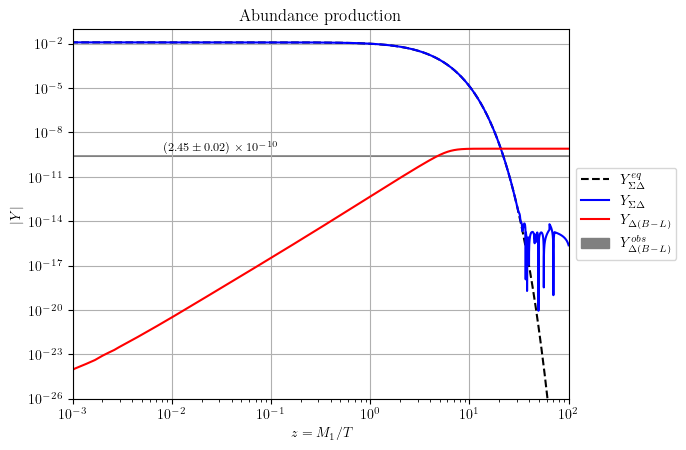

In [20]:
fig, ax = plt.subplots()
ax.plot(z_span, Sigma_Delta_eq(z_span), '--',color = 'black', label = r'$Y_{\Sigma \Delta}^{eq}$')
ax.plot(z_span, abs(general_sol_1.T[0]), color = 'blue', label = r'$Y_{\Sigma \Delta}$')
ax.plot(z_span, abs(general_sol_1.T[1]), color = 'red', label = r'$Y_{\Delta(B-L)}$')
ax.fill_between(np.linspace(10**(-4),10e2,100000),2.43*10**(-10),2.47*10**(-10),color = 'gray',
                label = r'$Y_{\Delta(B-L)}^{obs}$')
ax.set_xlabel(r'$z=M_1/T$')
ax.set_ylabel(r'$|Y|$')
ax.legend(loc='center left',bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(r'Abundance production')
ax.text(10**(-1.5),10**(-9),r'$(2.45\pm0.02)\times 10^{-10}$',horizontalalignment='center',
        verticalalignment='center',fontsize = 'small')
ax.set_ylim((10**(-26),10**(-1)))
ax.set_xlim((10e-4,100))
ax.grid()
plt.show()
fig.savefig('type 2 scalar abundance.pdf', bbox_inches='tight',dpi=500)

$$ sHz\frac{dY_{\Sigma \Delta}}{dz} =\gamma_D \left(\frac{Y_{\Sigma \Delta}}{Y_{\Sigma \Delta}^{eq}}-1\right)-2\gamma_A \left(\left (\frac{Y_{\Sigma \Delta}}{Y_{\Sigma \Delta}^{eq}}\right)^2-1\right) $$

$$ sHz\frac{dY_{\Delta \Delta}}{dz} = -\gamma_D\left(\frac{Y_{\Delta \Delta}}{Y_{\Sigma \Delta}^{eq}}+\frac{Y_{\Delta(B-L)}+2Y_{\Delta \Delta}}{Y^{nor}g_H\zeta_H}
\right)$$

$$sHz\frac{dY_{\Delta(B-L)}}{dz} = -\gamma_D \epsilon_\Delta \left(\frac{Y_{\Sigma \Delta}}{Y_{\Sigma \Delta}^{eq}}-1\right)+ W^{II},$$
where 
$$ W^{II} \equiv \frac{2\gamma_D}{\lambda_H^2+\lambda_\ell^2}\left \{ \lambda_\ell^2 \frac{Y_{\Delta \Delta}}{Y_{\Sigma \Delta}^{eq}}+ \frac{1}{2Y^{nor} g_\ell \zeta_\ell} \text{Tr} \left( 2 f \Delta_\ell^T + ff^\dagger \Delta_\ell + \Delta_\ell ff^\dagger \right)
\right\};\;\; \Delta_\ell \equiv Y_{\Delta \ell}$$
and 
$$ \lambda_\ell^2 = \frac{\text{Tr}(ff^\dagger)}{\text{Tr}(ff^\dagger)+|\mu|^2/M_\Delta^2};\;\; \lambda_H = \frac{|\mu|^2/M_\Delta^2}{\text{Tr}(ff^\dagger)+|\mu|^2/M_\Delta^2}$$


In [46]:
#Boltzmann equation for Y_{B-L}, Y_{\sum \Delta} addind the third equation 
start = timer()
def dY_no_gauge(z,Y): #Y[0] = Y_{\sum \Delta}, Y[1]= Y_{\Delta \Delta} and Y[3]= Y_{\Delta(B-L)}
    epsillon = 10e-4
    Y_H_eq = 15*3*2/(g_star*8*pi**2)
    return [-D(z)*(Y[0]/Sigma_Delta_eq(z)-1)-A(z)*((Y[0]/Sigma_Delta_eq(z))**2-1),
            -D(z)*(Y[1]/Sigma_Delta_eq(z)+(Y[2]+2*Y[1])/Y_H_eq),
            -D(z)*(Y[0]/Sigma_Delta_eq(z)-1)]
    
z_span = np.linspace(10**(-3),10**(3),10000000)
    
general_sol_2 = odeint(dY_no_gauge,y0=[Sigma_Delta_0,0,0],t=z_span,tfirst=True,rtol=10**(-12),atol=1e-13)
end = timer()
print(end-start,'s')

0.5441867000045022 s


C:\Users\artur\AppData\Local\Temp\ipykernel_13676\3941823092.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  return [-D(z)*(Y[0]/Sigma_Delta_eq(z)-1)-A(z)*((Y[0]/Sigma_Delta_eq(z))**2-1),
C:\Users\artur\AppData\Local\Temp\ipykernel_13676\3941823092.py:6: RuntimeWarning: invalid value encountered in scalar multiply
  return [-D(z)*(Y[0]/Sigma_Delta_eq(z)-1)-A(z)*((Y[0]/Sigma_Delta_eq(z))**2-1),
C:\Users\artur\AppData\Local\Temp\ipykernel_13676\3941823092.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  -D(z)*(Y[1]/Sigma_Delta_eq(z)+(Y[2]+2*Y[1])/Y_H_eq),
C:\Users\artur\AppData\Local\Temp\ipykernel_13676\3941823092.py:7: RuntimeWarning: invalid value encountered in scalar multiply
  -D(z)*(Y[1]/Sigma_Delta_eq(z)+(Y[2]+2*Y[1])/Y_H_eq),
C:\Users\artur\AppData\Local\Temp\ipykernel_13676\3941823092.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  -D(z)*(Y[0]/Sigma_Delta_eq(z)-1)]
C:\Users\artur\AppData\Local\Temp\ipykernel_13676\39418

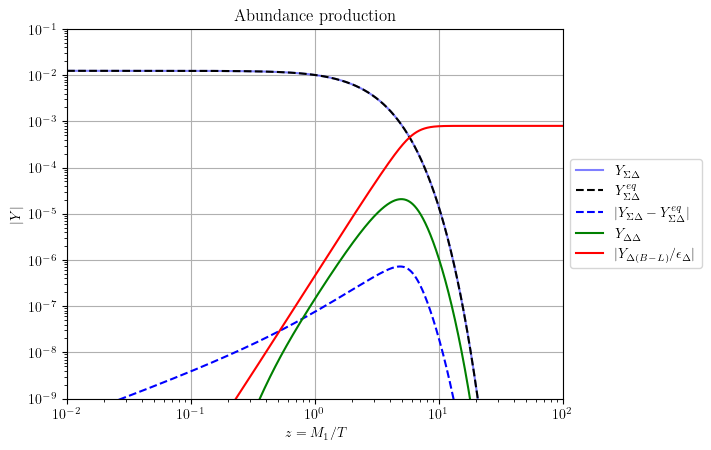

In [49]:
Sigma_difference = abs(general_sol_2.T[0]-Sigma_Delta_eq(z_span))
fig, ax = plt.subplots()
ax.plot(z_span, abs(general_sol_2.T[0]), color = 'blue',alpha=0.5, label = r'$Y_{\Sigma \Delta}$')
ax.plot(z_span, Sigma_Delta_eq(z_span), '--',color = 'black', label = r'$Y_{\Sigma \Delta}^{eq}$')
ax.plot(z_span, Sigma_difference, '--', color = 'blue', label = r'$|Y_{\Sigma \Delta}-Y_{\Sigma \Delta}^{eq}|$')
ax.plot(z_span, abs(general_sol_2.T[1]), color = 'green', label = r'$Y_{\Delta\Delta}$')
ax.plot(z_span, abs(general_sol_2.T[2]), color = 'red', label = r'$|Y_{\Delta(B-L)}/\epsilon_\Delta|$')
# ax.fill_between(np.linspace(10**(-4),10e2,100000),2.43*10**(-10),2.47*10**(-10),color = 'gray',
#                 label = r'$Y_{\Delta(B-L)}^{obs}$')
ax.set_xlabel(r'$z=M_1/T$')
ax.set_ylabel(r'$|Y|$')
ax.legend(loc='center left',bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(r'Abundance production')
ax.set_ylim((10**(-9),10**(-1)))
ax.set_xlim((10e-3,100))
ax.grid()
plt.show()
#fig.savefig('type 2 scalar abundance.pdf', bbox_inches='tight',dpi=500)

In [58]:
a = abs(general_sol_2.T[2])
len(a)

10000000

In [62]:
maximum = max(a)
cp_asymm = (2.45e-10)/maximum
cp_asymm

np.float64(3.0647937911404637e-07)

In [79]:
#Boltzmann equation for Y_{B-L}, Y_{\sum \Delta} addind the third equation 
start = timer()
def dY_no_gauge(z,Y): #Y[0] = Y_{\sum \Delta}, Y[1]= Y_{\Delta \Delta} and Y[3]= Y_{\Delta(B-L)}
    Y_H_eq = 15*3*2/(g_star*8*pi**2)
    return [-D(z)*(Y[0]/Sigma_Delta_eq(z)-1)-A(z)*((Y[0]/Sigma_Delta_eq(z))**2-1),
            -D(z)*(Y[1]/Sigma_Delta_eq(z)+(Y[2]+2*Y[1])/Y_H_eq),
            -cp_asymm*D(z)*(Y[0]/Sigma_Delta_eq(z)-1)]
    
z_span = np.linspace(10**(-3),10**(3),10000000)
    
general_sol_2 = odeint(dY_no_gauge,y0=[Sigma_Delta_0,0,0],t=z_span,tfirst=True,rtol=10**(-13),atol=10**(-12))
end = timer()
print(end-start,'s')

0.3558530000009341 s


C:\Users\artur\AppData\Local\Temp\ipykernel_13676\399386147.py:5: RuntimeWarning: overflow encountered in scalar power
  return [-D(z)*(Y[0]/Sigma_Delta_eq(z)-1)-A(z)*((Y[0]/Sigma_Delta_eq(z))**2-1),
C:\Users\artur\AppData\Local\Temp\ipykernel_13676\399386147.py:5: RuntimeWarning: invalid value encountered in scalar multiply
  return [-D(z)*(Y[0]/Sigma_Delta_eq(z)-1)-A(z)*((Y[0]/Sigma_Delta_eq(z))**2-1),
C:\Users\artur\AppData\Local\Temp\ipykernel_13676\399386147.py:11: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  general_sol_2 = odeint(dY_no_gauge,y0=[Sigma_Delta_0,0,0],t=z_span,tfirst=True,rtol=10**(-13),atol=10**(-12))


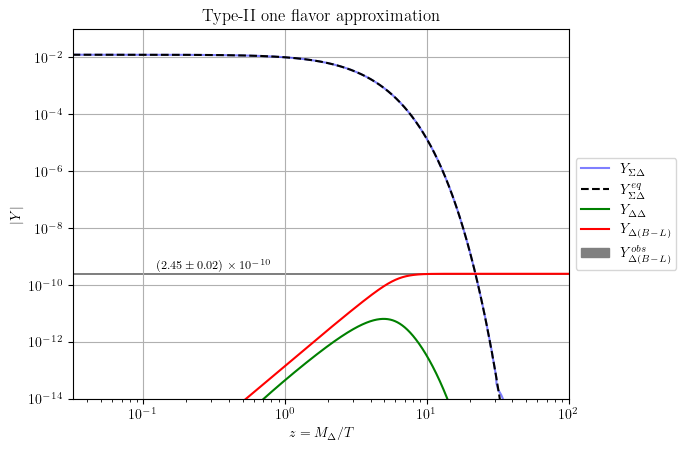

In [81]:
fig, ax = plt.subplots()
ax.plot(z_span, abs(general_sol_2.T[0]), color = 'blue',alpha=0.5, label = r'$Y_{\Sigma \Delta}$')
ax.plot(z_span, Sigma_Delta_eq(z_span), '--',color = 'black', label = r'$Y_{\Sigma \Delta}^{eq}$')
ax.plot(z_span, abs(general_sol_2.T[1]), color = 'green', label = r'$Y_{\Delta\Delta}$')
ax.plot(z_span, abs(general_sol_2.T[2]), color = 'red', label = r'$Y_{\Delta(B-L)}$')
ax.fill_between(np.linspace(10**(-4),10e2,100000),2.43*10**(-10),2.47*10**(-10),color = 'gray',
             label = r'$Y_{\Delta(B-L)}^{obs}$')
ax.text(10**(-0.5),10**(-9.3),r'$(2.45\pm0.02)\times 10^{-10}$',horizontalalignment='center',
        verticalalignment='center',fontsize = 'small')
ax.set_xlabel(r'$z=M_\Delta/T$')
ax.set_ylabel(r'$|Y|$')
ax.legend(loc='center left',bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(r'Type-II one flavor approximation')
ax.set_ylim((10**(-14),10**(-1)))
ax.set_xlim((10**(-1.5),100))
ax.grid()
plt.show()
fig.savefig('type 2 scalar abundance.pdf', bbox_inches='tight',dpi=500)

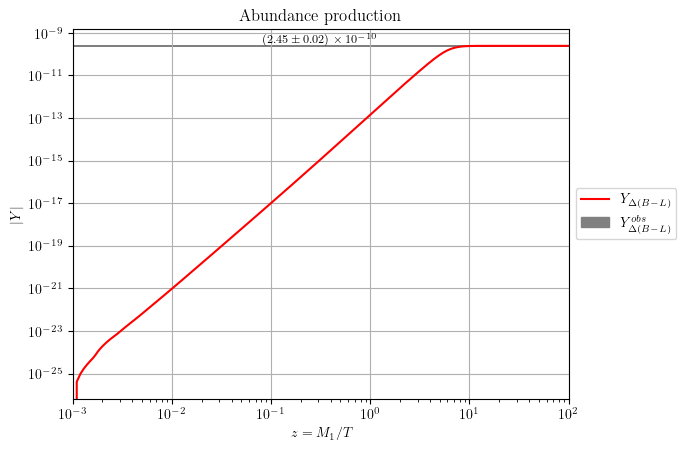

In [69]:
fig, ax = plt.subplots()
ax.plot(z_span, abs(general_sol_2.T[2]), color = 'red', label = r'$Y_{\Delta(B-L)}$')
ax.fill_between(np.linspace(10**(-4),10e2,100000),2.43*10**(-10),2.47*10**(-10),color = 'gray',
             label = r'$Y_{\Delta(B-L)}^{obs}$')
ax.text(10**(-0.5),10**(-9.3),r'$(2.45\pm0.02)\times 10^{-10}$',horizontalalignment='center',
        verticalalignment='center',fontsize = 'small')
ax.set_xlabel(r'$z=M_1/T$')
ax.set_ylabel(r'$|Y|$')
ax.legend(loc='center left',bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(r'Abundance production')
ax.set_xlim((10**(-3),100))
ax.grid()
plt.show()